In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [3]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

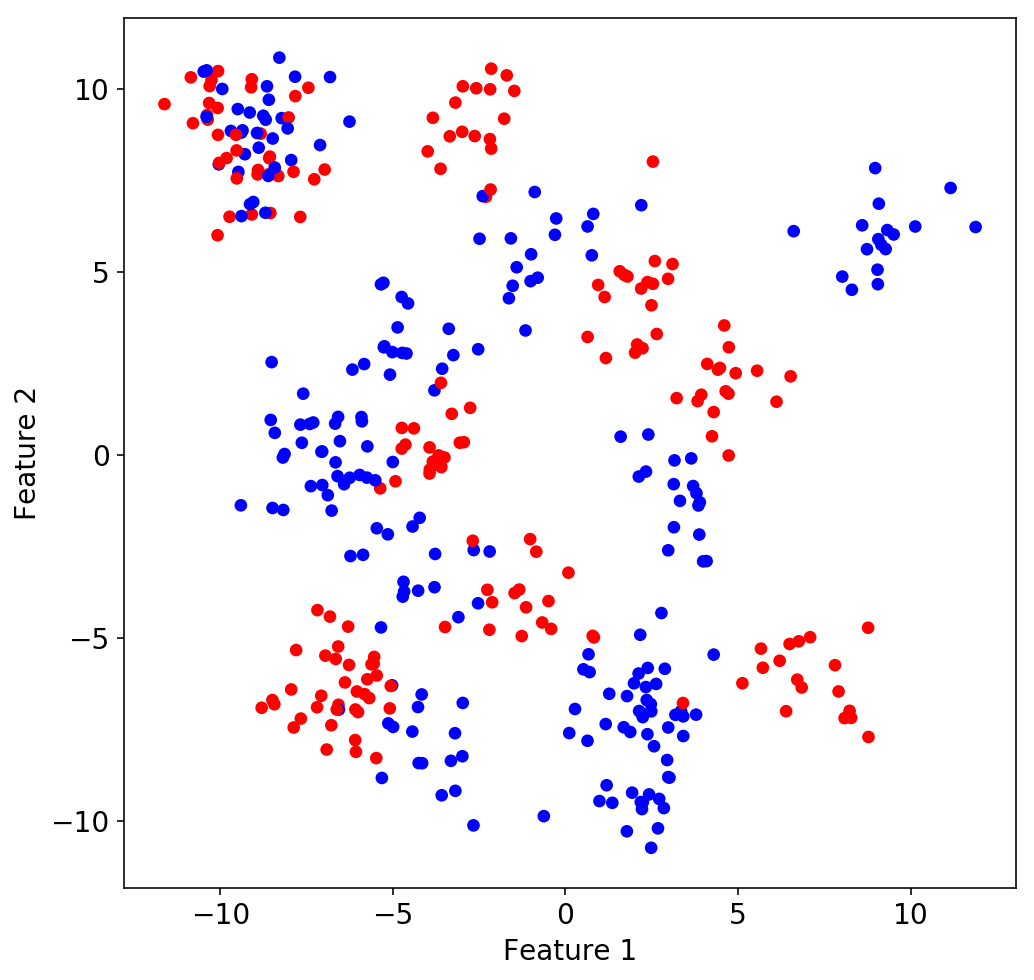

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
clf.score(X_train, y_train)

0.91000000000000003

In [9]:
clf.score(X_test, y_test)

0.86499999999999999

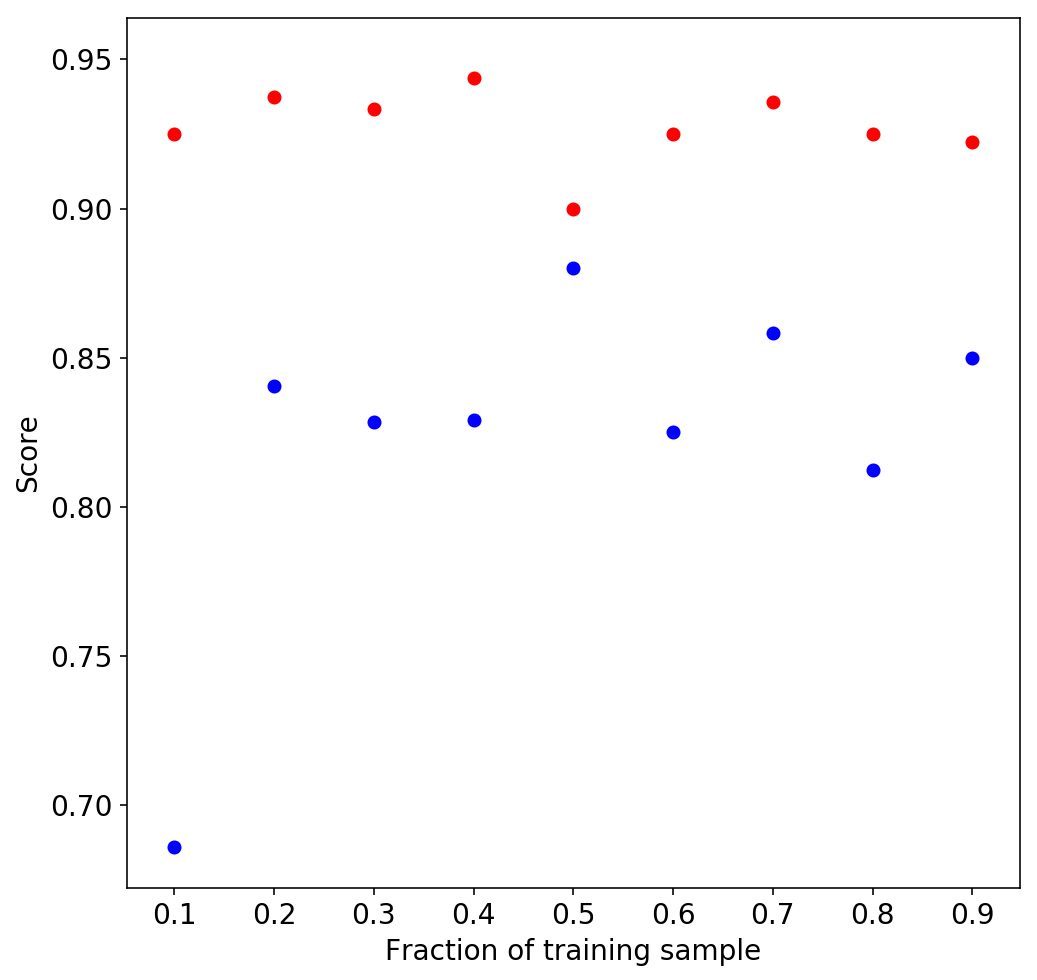

In [10]:
training_score = []
testing_score = []


for f in np.linspace(0.1,0.9,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f)
    clf.fit(X_train, y_train)
    training_score.append(clf.score(X_train, y_train))
    testing_score.append(clf.score(X_test, y_test))

fracs = np.linspace(0.1,0.9,9)
plt.scatter(fracs, training_score, c='r')
plt.scatter(fracs, testing_score, c='b')
plt.xlabel("Fraction of training sample")
plt.ylabel("Score")  

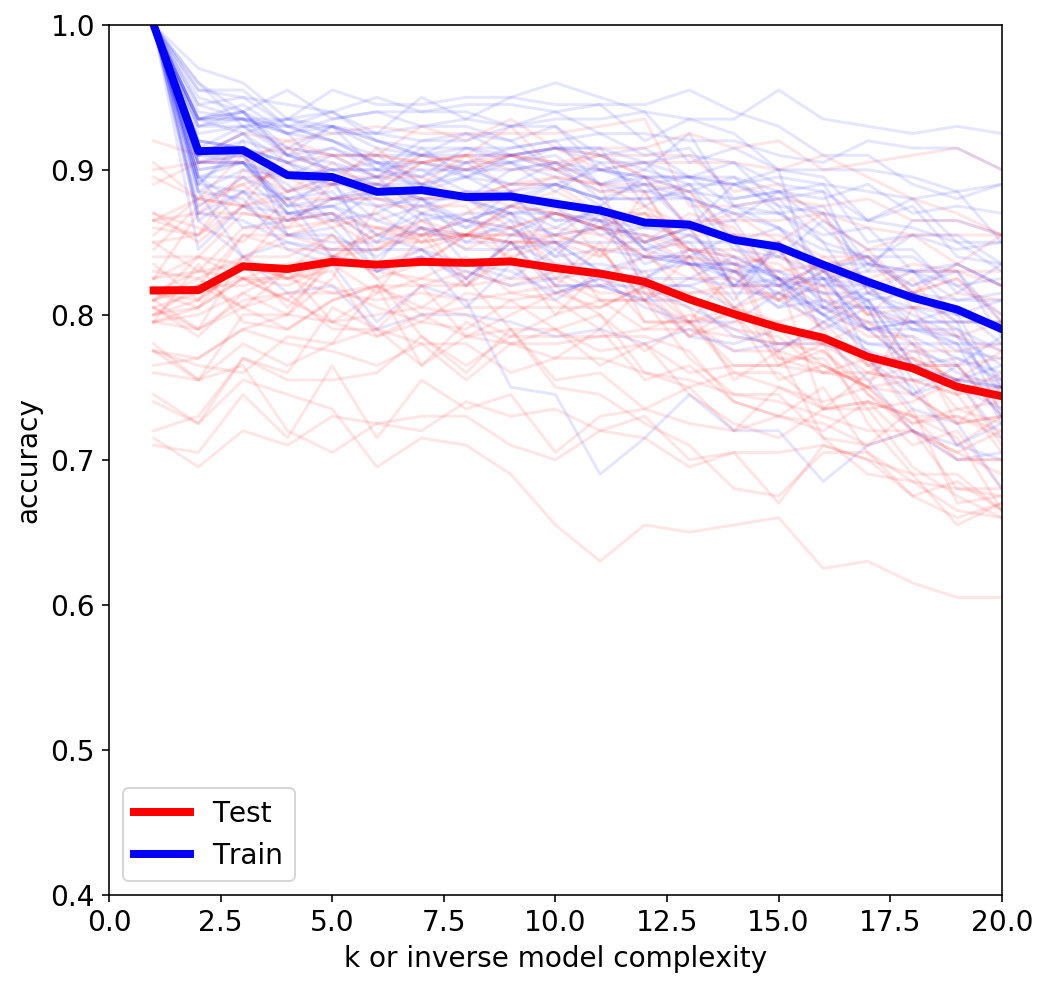

In [11]:
accuracies_test = []
accuracies_train = []
ks = np.arange(1, 21, 1)

for n in range(50):
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y < 10))
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores = []
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(ks, train_scores, c='b', alpha=0.1)
    plt.plot(ks, test_scores, c='r', alpha=0.1)
    
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k or inverse model complexity')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.xlim((0, max(ks)))
plt.ylim((0.4, 1.));



In [12]:
print(ks[np.argmax(np.array(accuracies_test).mean(axis=0))])

9


Best k is 5 because it maximises the score on the test sample

the smaller the k, the more complex the model is

# Question 2

In [13]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

In [14]:
X, y = make_regression()

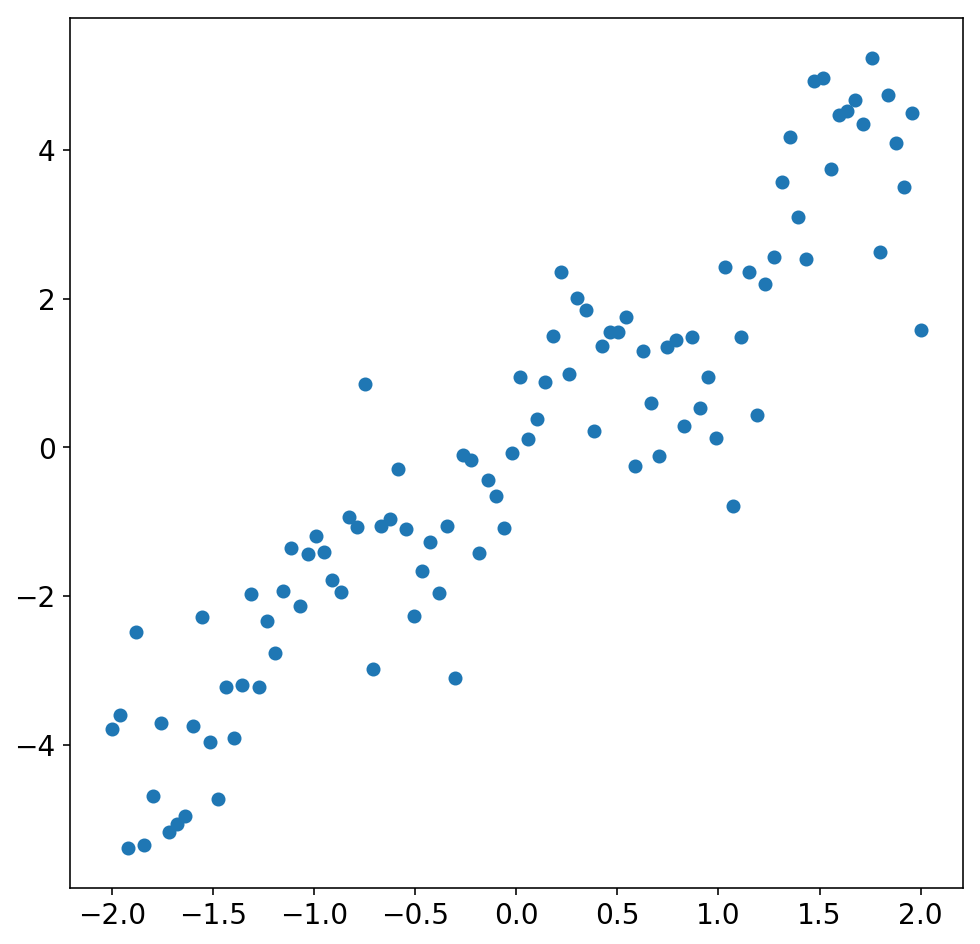

In [15]:
plt.scatter(X,y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

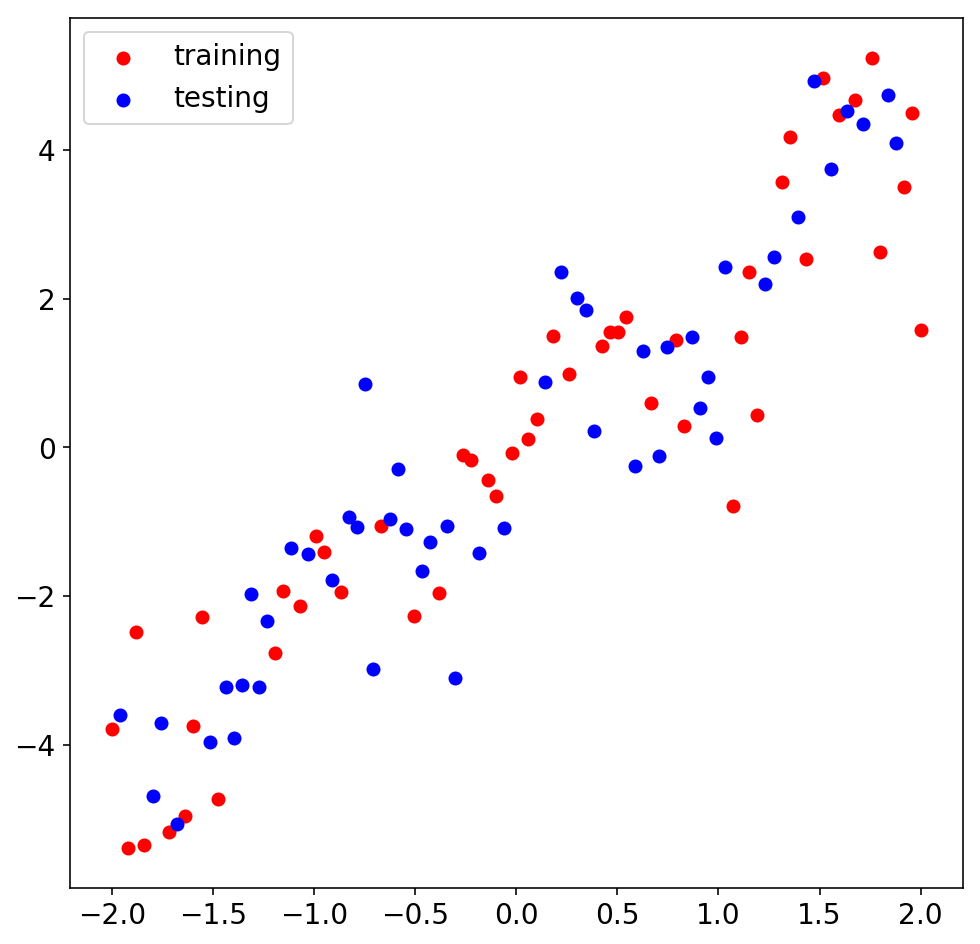

In [17]:
plt.scatter(X_train,y_train,c='r', label='training')
plt.scatter(X_test,y_test,c='b', label='testing')
plt.legend(loc='best')

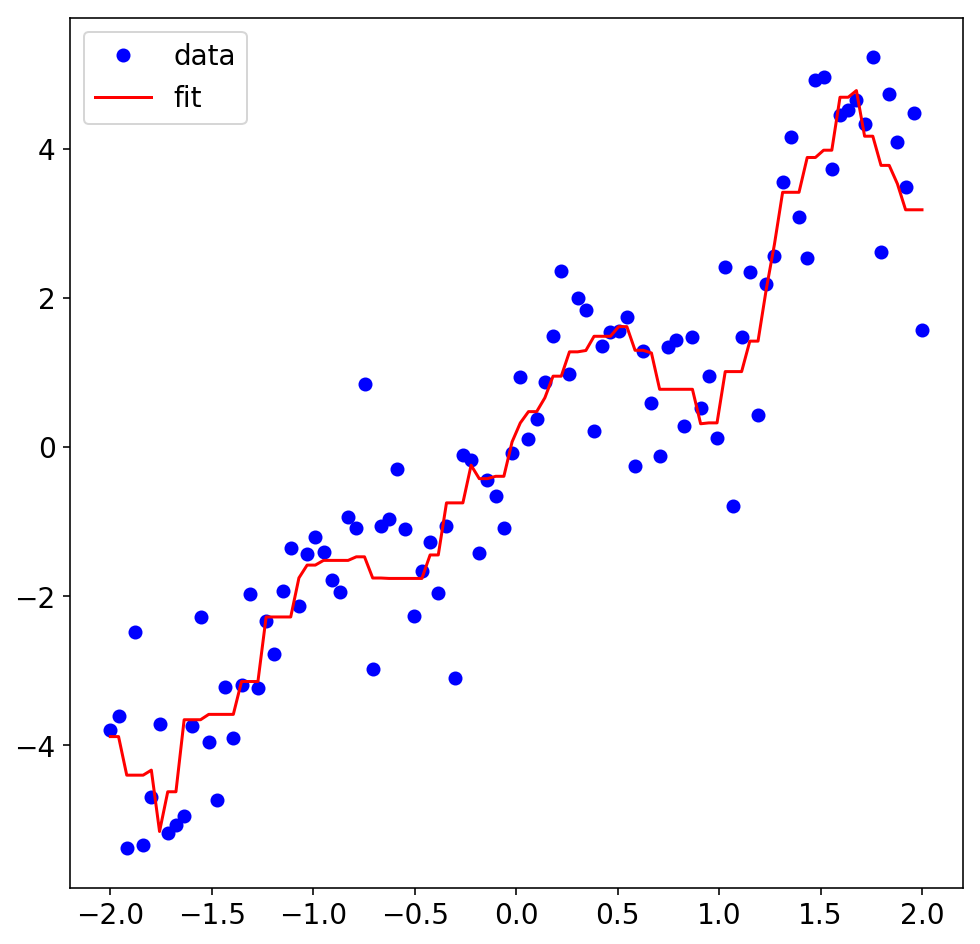

In [18]:
from sklearn.neighbors import KNeighborsRegressor

kNR = KNeighborsRegressor(n_neighbors=3)
kNR.fit(X_train,y_train)

line = np.linspace(-2, 2, 100).reshape(-1, 1)
plt.plot(X, y, 'ob', label='data')
plt.plot(line, kNR.predict(line), '-r', label='fit')
plt.legend(loc='best')

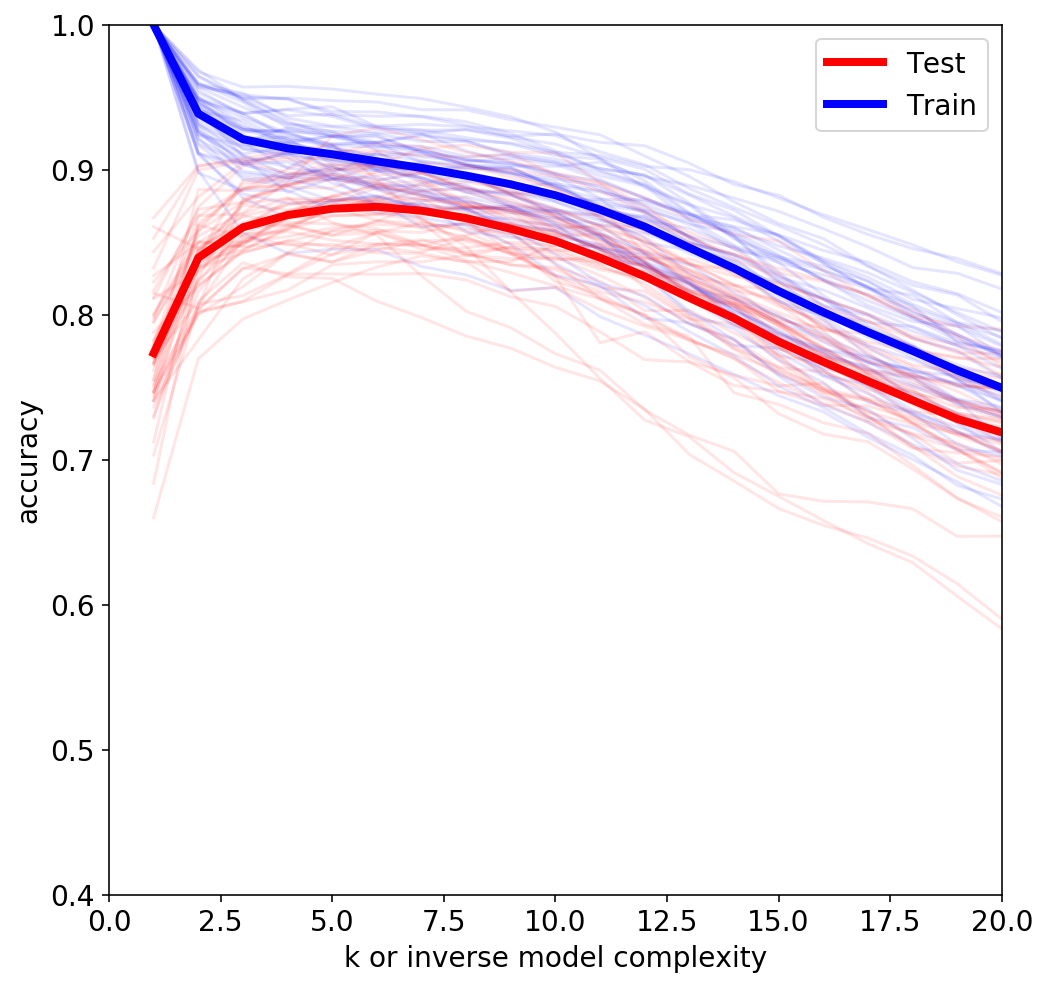

In [19]:
accuracies_test = []
accuracies_train = []
ks = np.arange(1, 21, 1)

for n in range(50):
    X, y = make_regression()
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores = []
    for k in ks:
        kNR = KNeighborsRegressor(n_neighbors=k)
        kNR.fit(X_train,y_train)
        train_scores.append(kNR.score(X_train, y_train))
        test_scores.append(kNR.score(X_test, y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(ks, train_scores, c='b', alpha=0.1)
    plt.plot(ks, test_scores, c='r', alpha=0.1)
    
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k or inverse model complexity')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.xlim((0, max(ks)))
plt.ylim((0.4, 1.));

In [20]:
ks[np.argmax(np.array(accuracies_test).mean(axis=0))]

6

The best k is 6 because it maximises the testing score

this is using score

now use mean squared error

(0, 20)

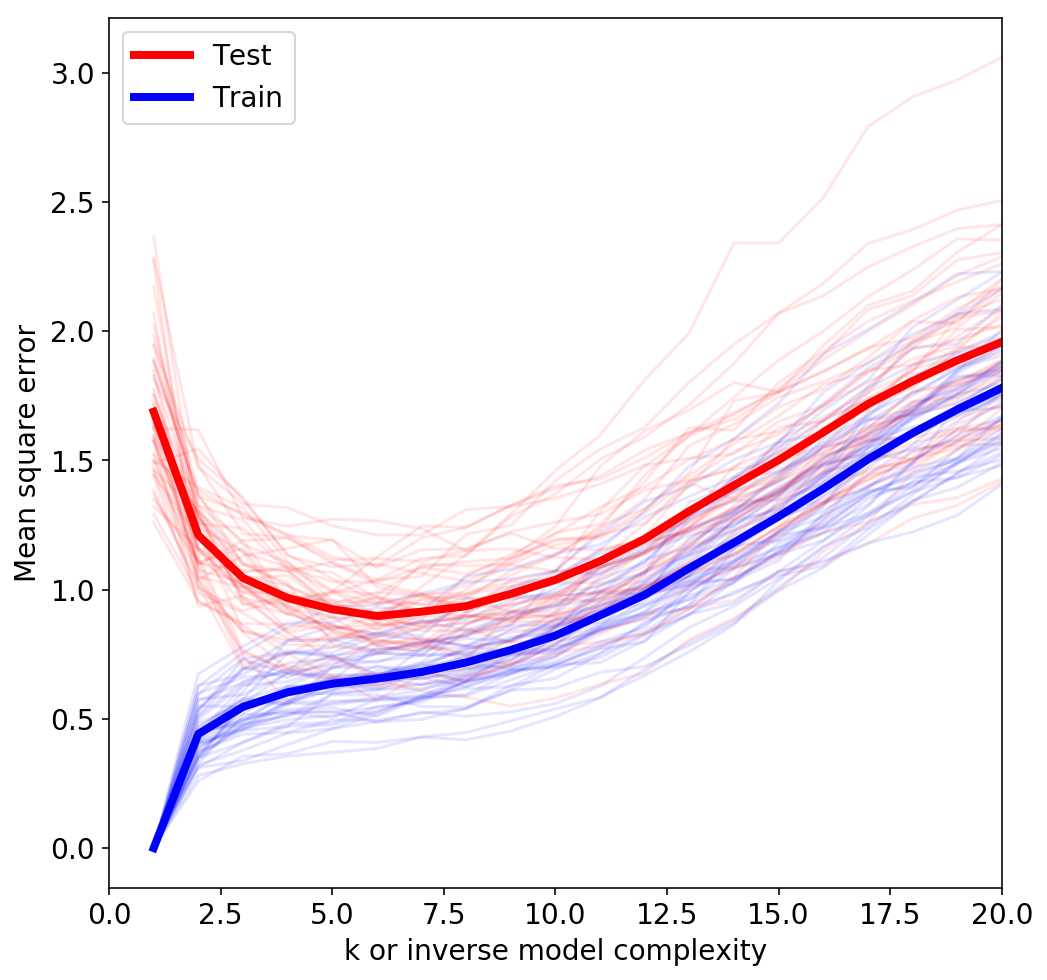

In [21]:
accuracies_test = []
accuracies_train = []
ks = np.arange(1, 21, 1)

from sklearn.metrics import mean_squared_error as mse

for n in range(50):
    X, y = make_regression()
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores = []
    for k in ks:
        kNR = KNeighborsRegressor(n_neighbors=k)
        kNR.fit(X_train,y_train)
        train_scores.append(mse(y_train, kNR.predict(X_train)))
        test_scores.append(mse(y_test, kNR.predict(X_test)))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(ks, train_scores, c='b', alpha=0.1)
    plt.plot(ks, test_scores, c='r', alpha=0.1)
    
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k or inverse model complexity')
plt.ylabel('Mean square error')
plt.legend(loc='best')
plt.xlim((0, max(ks)))

In [22]:
ks[np.argmin(np.array(accuracies_test).mean(axis=0))]

6

This time, you need to minimise the MSE, but it happens also with 6 NN

# Question 3

In [35]:
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

A linear regression fits a continuous dataset whereas the logistic regression fits a dataset where only 2 values are allowed, typically 0 and 1

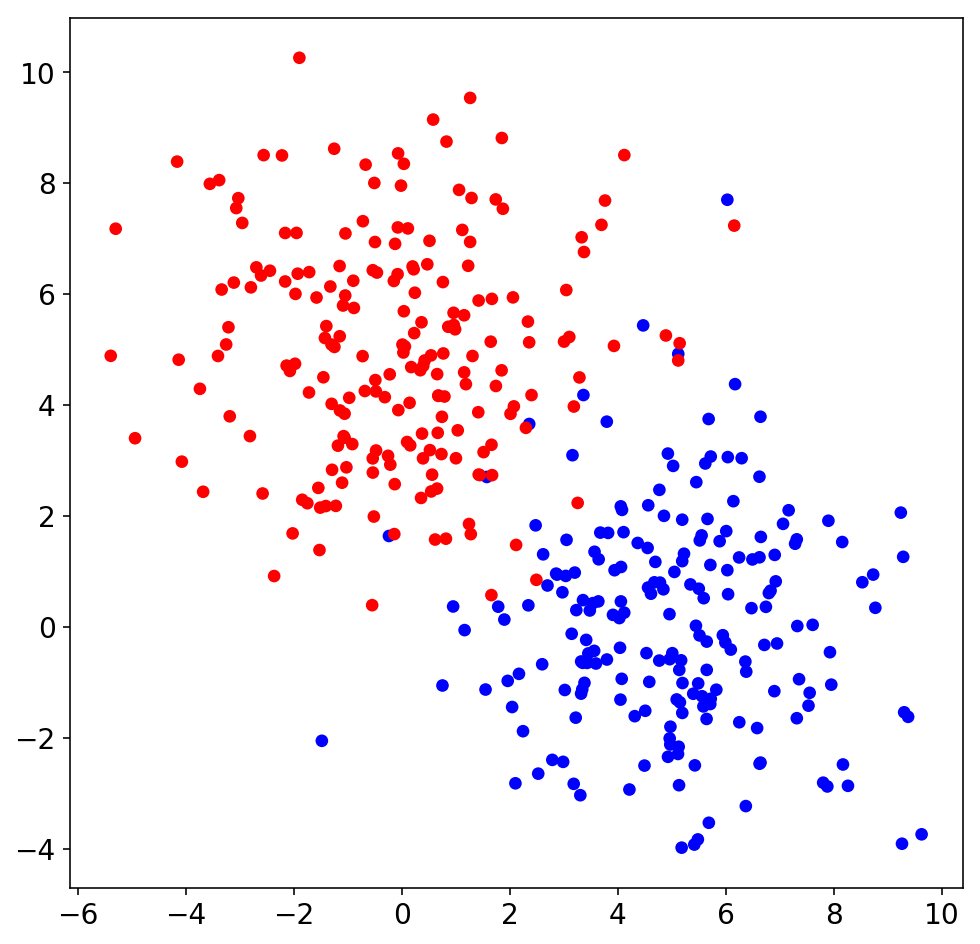

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

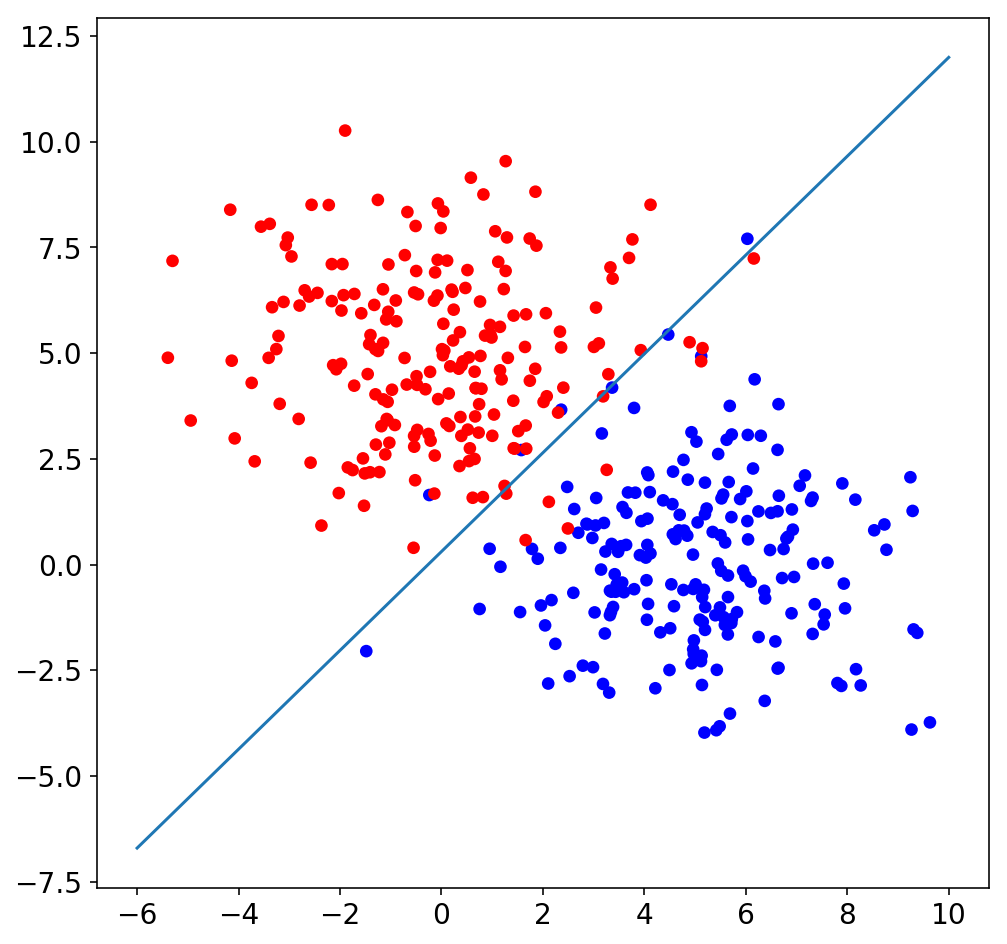

In [38]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
Beta0 = LR.intercept_
Beta1 = LR.coef_
line = np.linspace(-6, 10, 100).reshape(-1, 1)
#y_fit = (-Beta0 - line * Beta1[0][1])/Beta1[0][0]
y_fit = -(line*Beta1[0,0] - Beta0[0]) / Beta1[0,1]
#-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.plot(line,y_fit)

why are there two betas ? and why is this function like that ?

In [27]:
print(LR.predict([[-4, -10]]))
print(LR.predict_proba([[-4, -10]]))
print(LR.predict([[-4, 10]]))
print(LR.predict_proba([[-4, 10]]))

['b']
[[ 0.9944007  0.0055993]]
['r']
[[  1.04422058e-07   9.99999896e-01]]


In [41]:
print(Beta1)

[[-1.38510996  1.18488309]]


In [44]:
print(Beta1[0,0])

-1.38510995592


In [45]:
print(Beta1.shape)

(1, 2)


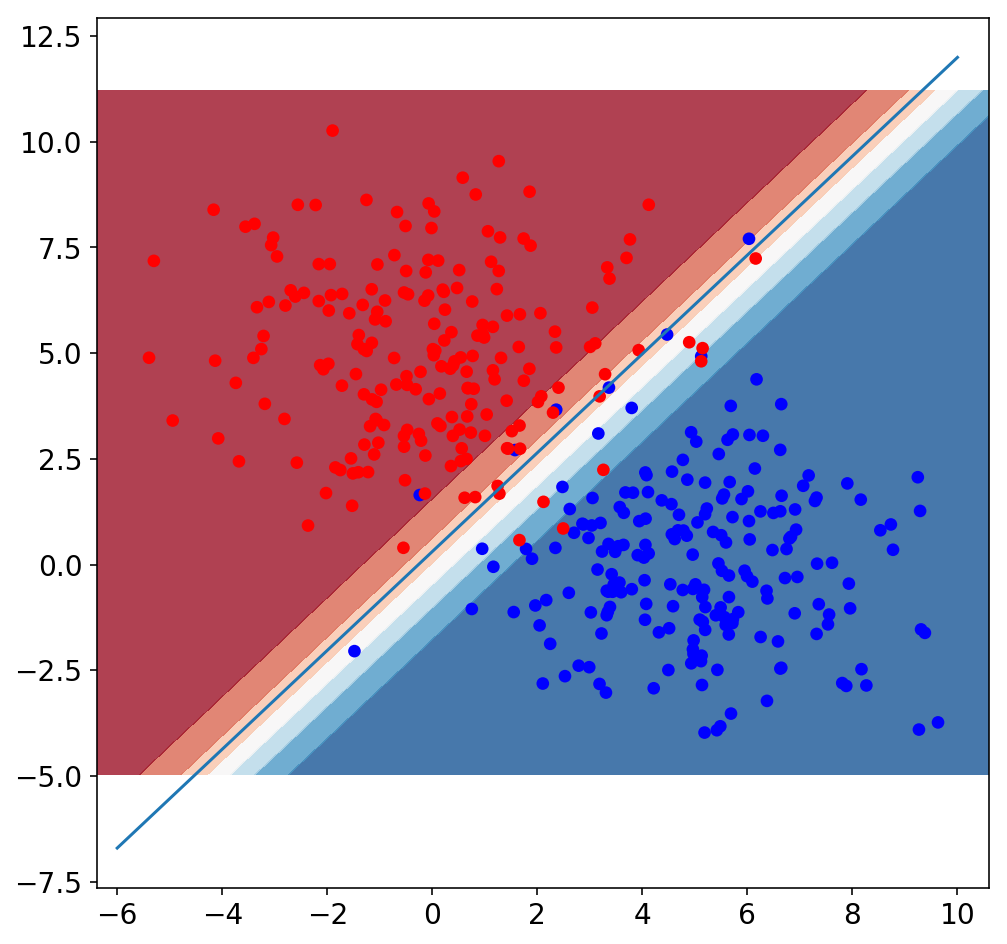

In [39]:
h=0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = LR.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.plot(line,y_fit)

Why is the line not in the white space ?

# Question 4

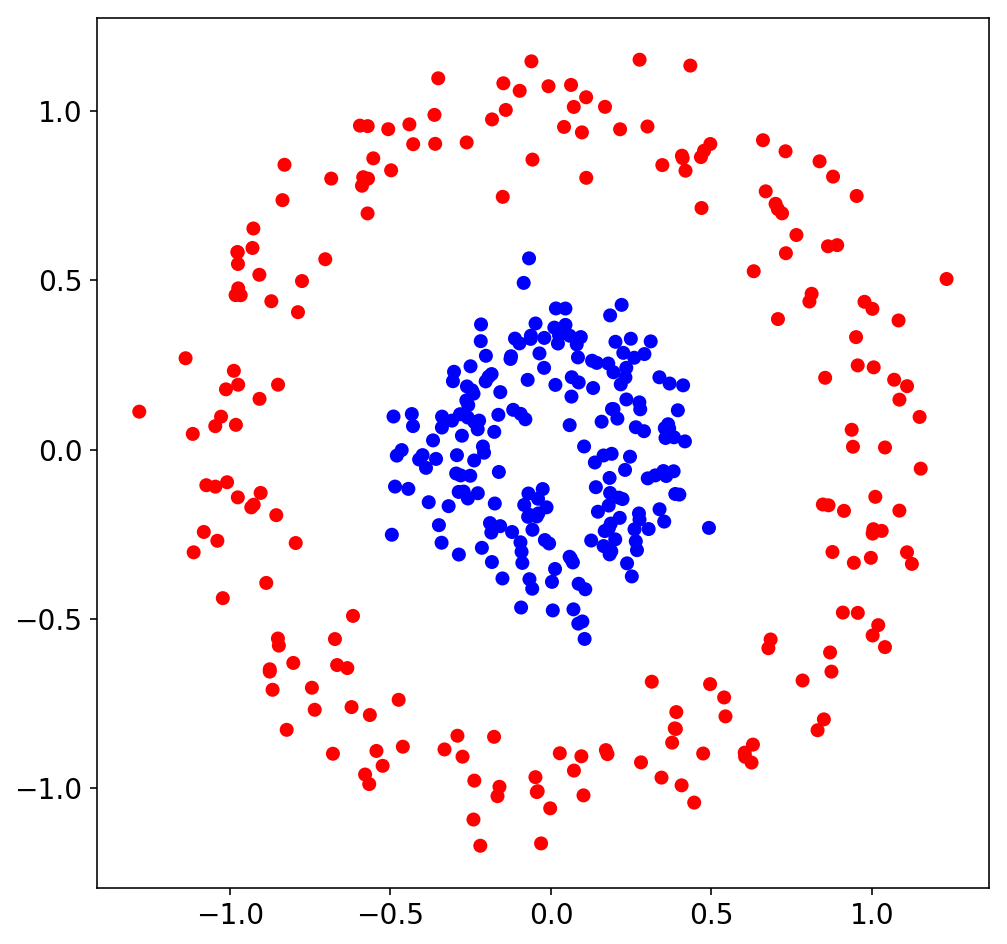

In [76]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

0.61
0.53
[-0.16037596]
[[-0.07072451  0.15742141]]


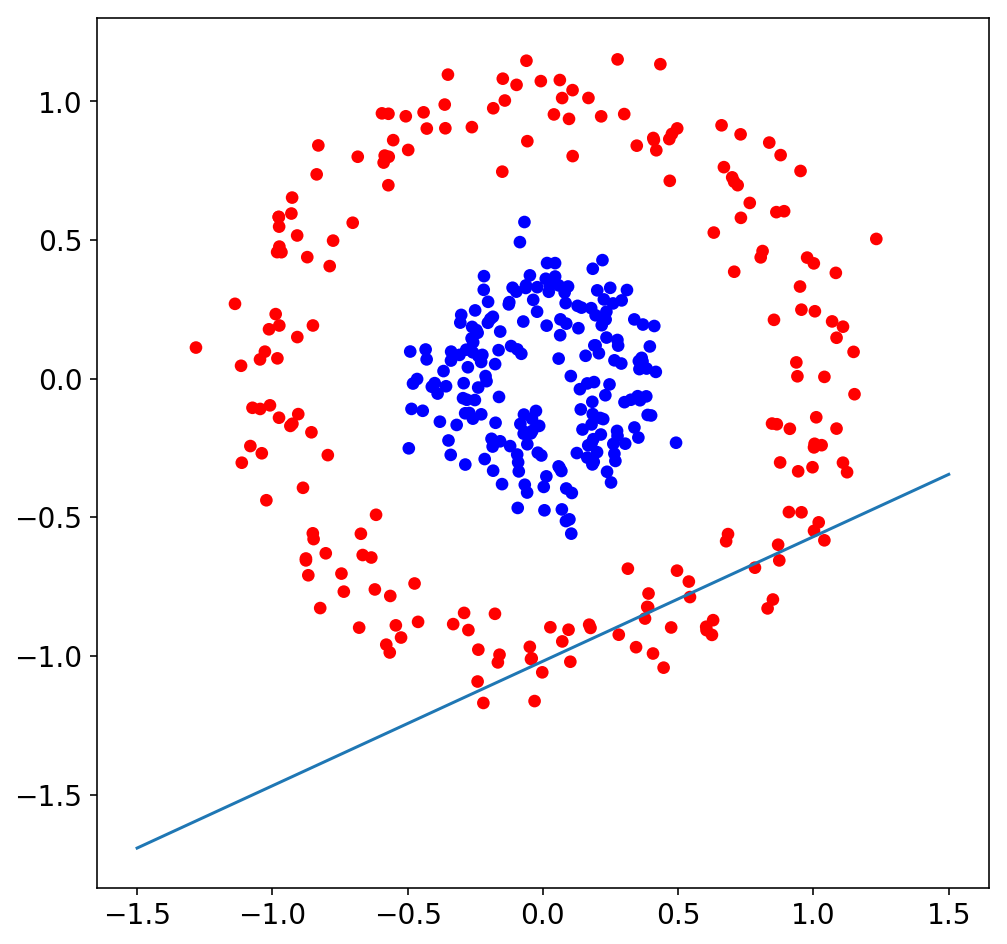

In [78]:
LR = LogisticRegression(C=0.99)
LR.fit(X_train,y_train)
print(LR.score(X_train,y_train))
print(LR.score(X_test,y_test))
Beta0 = LR.intercept_
Beta1 = LR.coef_
print(Beta0)
print(Beta1)
line = np.linspace(-1.5, 1.5, 100).reshape(-1, 1)
y_fit = -(line*Beta1[0,0] - Beta0[0]) / Beta1[0,1]
#y_fit = Beta0 + line * Beta1
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.plot(line,y_fit)

I don't know how to increase complexity of Logistic Regression

1.0


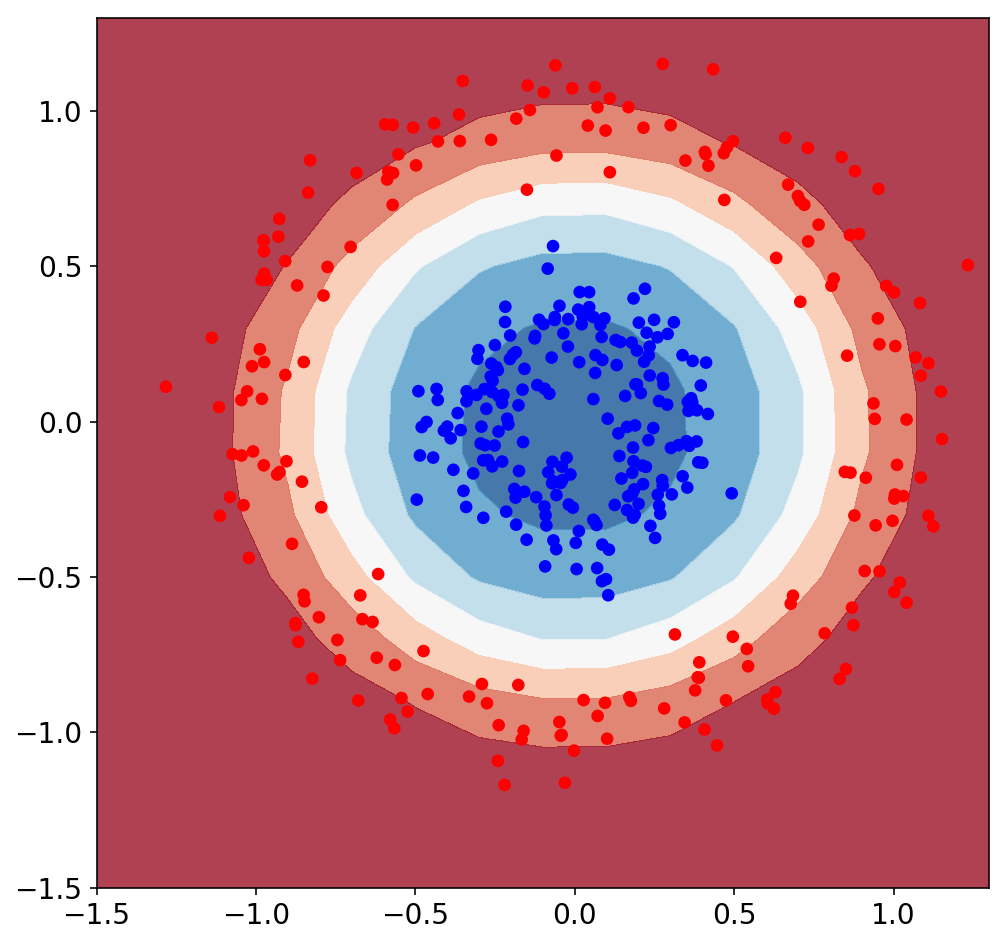

In [104]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
LR = LogisticRegression(C=0.9)

from sklearn.pipeline import Pipeline
pipeline = Pipeline([("polynomial_features", polynomial_features), ("logistic_regression", LR)])
pipeline.fit(X_train, y_train)

print(pipeline.score(X_test, y_test))


from sklearn.model_selection import cross_val_score
#scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error")



h=0.2
#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pipeline.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)

1.0


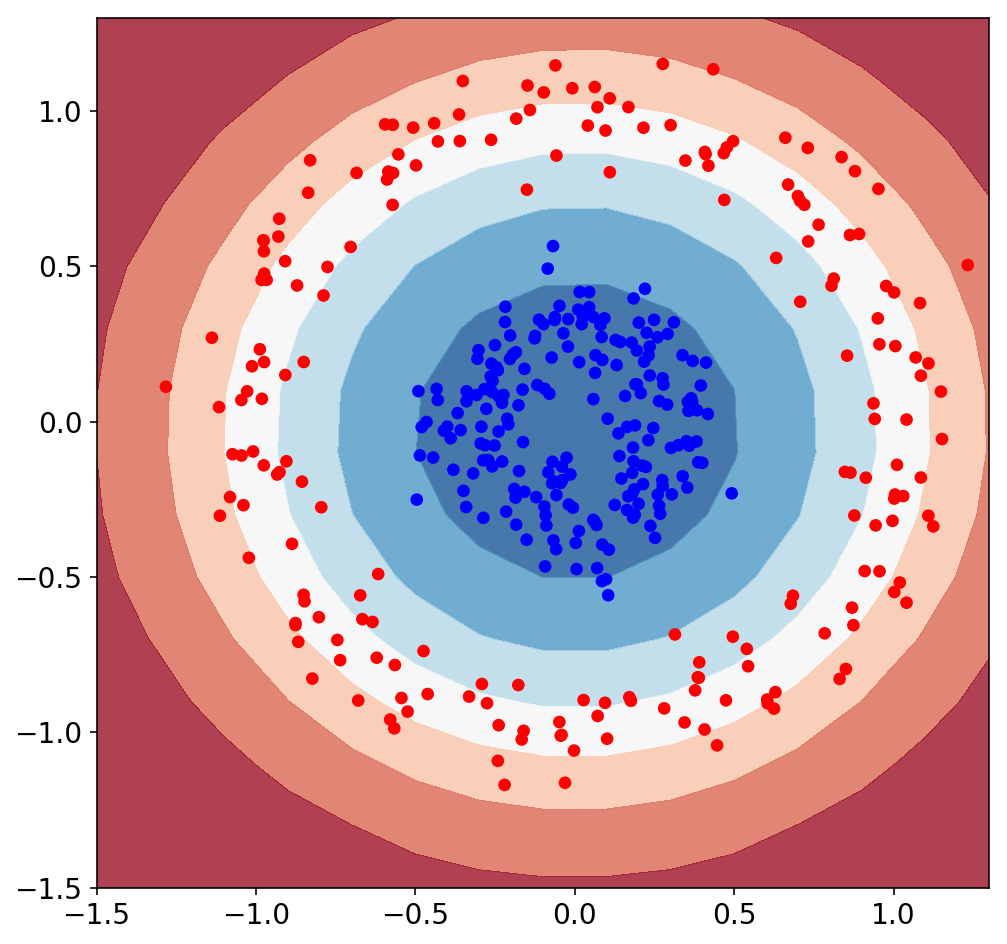

In [105]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
LR = LogisticRegression(C=0.1)

from sklearn.pipeline import Pipeline
pipeline = Pipeline([("polynomial_features", polynomial_features), ("logistic_regression", LR)])
pipeline.fit(X_train, y_train)

print(pipeline.score(X_test, y_test))


from sklearn.model_selection import cross_val_score
#scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error")



h=0.2
#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pipeline.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu_r)
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)